## Predict whether a person has diabetes or not.

Author: Vishal Raj

### Importing libraries

In [1]:
# package Import
import numpy as np
import pandas as pd
import time
import math
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Loading data

In [2]:
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Exploring the dataset

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.shape

(2000, 9)

In [5]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [6]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


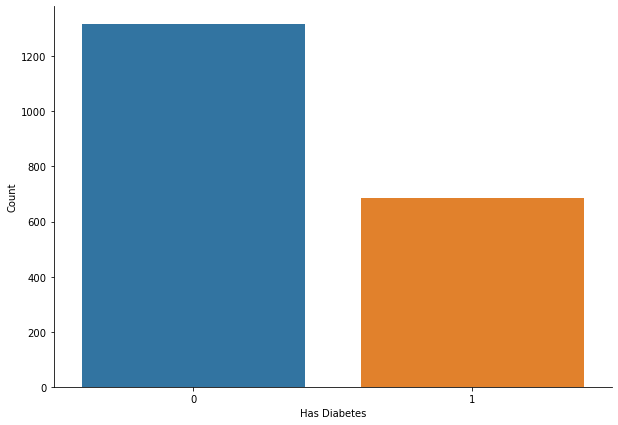

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

### Data Cleaning

In [13]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

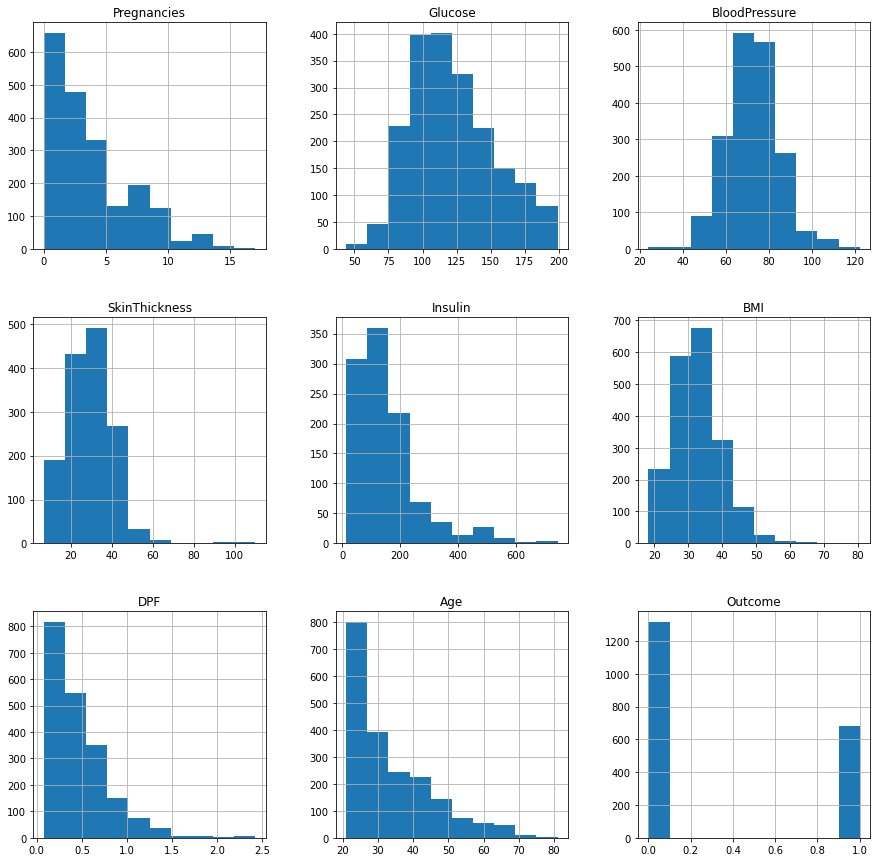

In [14]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [15]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

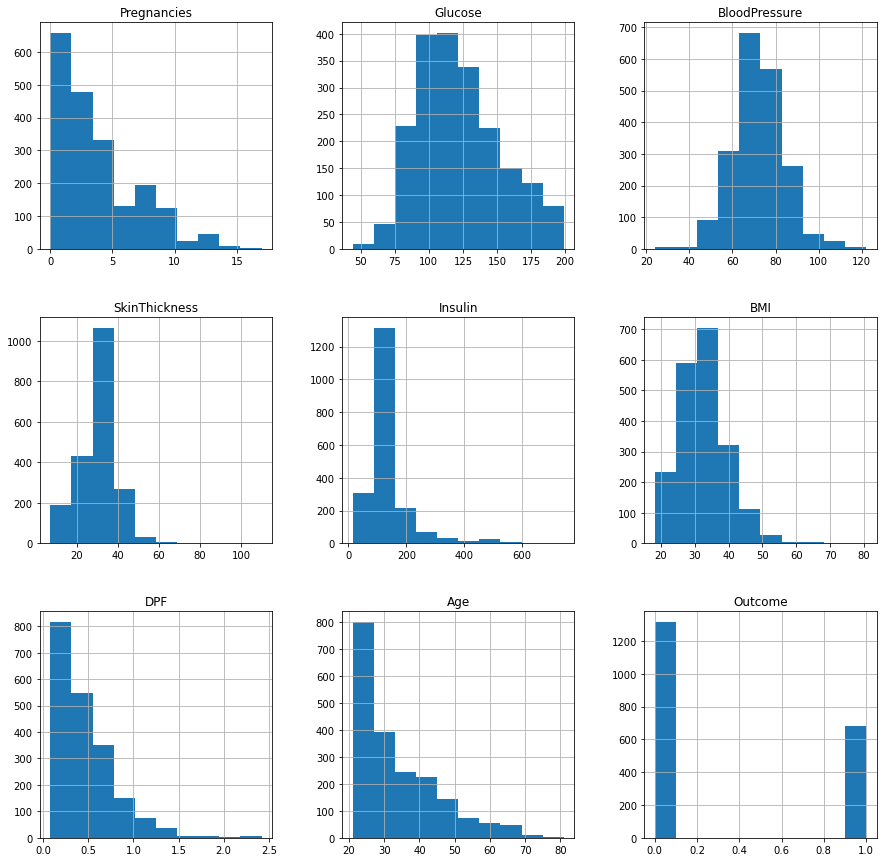

In [16]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [17]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [18]:
X = df.drop(columns='Outcome')
y = df['Outcome']

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# describes info about train and test set
print("Number of X_train dataset: ", x_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("Number of X_test dataset: ", x_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (1500, 8)
Number of y_train dataset:  (1500,)
Number of X_test dataset:  (500, 8)
Number of y_test dataset:  (500,)


In [20]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

# Model Building 

In [21]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy=list()

### Model Training

In [22]:
from sklearn import metrics
import pickle

In [23]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):



    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [24]:
def predict(clf_model,algo=None, sampling=None,random_state=42):

    # Test set prediction 
    y_pred=clf_model.predict(x_test)
    

    
    print('Training score : {}'.format(clf_model.score(x_train,y_train)*100))
    
    print('Testing_score is :{}'.format(clf_model.score(x_test, y_test)*100))
    print('='*60)
    
    print("Accuracy Score (y_test vs y_pred):{}".format(accuracy_score(y_test,y_pred)*100))
    score = cross_val_score(clf_model, x_train, y_train, cv=5,scoring = 'accuracy')
    print("Cross validation Score is",np.mean(score)*100)
    print('='*60)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('='*60)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['Zero', 'One']
    cf_matrix=confusion_matrix(y_test,y_pred)
    plt.style.use('seaborn-poster')
    sns.set(font_scale=1.4)
    make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='vlag', title='Confusion Matrix',figsize=(7,5))
    
    print('='*60)

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    resample.append(sampling)
    Accuracy.append(accuracy_score(y_test,y_pred))

    

### Model-1: Logistic Regression
 

In [25]:
log_model=LogisticRegression(random_state=42)

params={'C':np.logspace(-10, 1, 15)}
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='accuracy', n_jobs=-1,verbose = 2)
clf_LR.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 6.10540230e-10, 3.72759372e-09, 2.27584593e-08,
       1.38949549e-07, 8.48342898e-07, 5.17947468e-06, 3.16227766e-05,
       1.93069773e-04, 1.17876863e-03, 7.19685673e-03, 4.39397056e-02,
       2.68269580e-01, 1.63789371e+00, 1.00000000e+01])},
             scoring='accuracy', verbose=2)

In [26]:
LR=clf_LR.best_estimator_
LR

LogisticRegression(C=1.6378937069540613, random_state=42)

Training score : 76.8
Testing_score is :79.4
Accuracy Score (y_test vs y_pred):79.4
Cross validation Score is 76.73333333333333
Confusion Matrix
[[290  30]
 [ 73 107]] 

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       320
           1       0.78      0.59      0.68       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.79       500
 



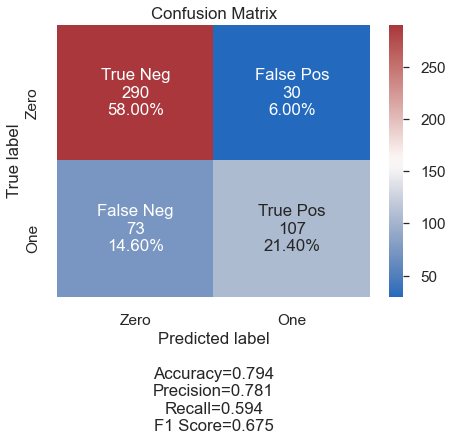

In [27]:
predict(LR,algo='Logistic Regression',sampling= 'actual',random_state=42)


### Model- 2. Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT_model = DecisionTreeClassifier(random_state=42)

# Maximum number of depth in each tree:
max_depth = [i for i in range(5,50,2)]

# Number of features to consider at every split
max_features = ['auto', 'None']

# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50,75, 100]

# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2,4,5]

In [30]:
DT_model = DecisionTreeClassifier(random_state=42)
tree_param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(tree_param_grid )


{'max_features': ['auto', 'None'], 'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'min_samples_split': [2, 5, 10, 15, 20, 50, 75, 100], 'min_samples_leaf': [1, 2, 4, 5], 'criterion': ['entropy', 'gini']}


In [31]:
#### Fit the grid_search to the data
DT= RandomizedSearchCV(DT_model, tree_param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
DT.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19, 21, 23, 25, 27, 29,
                                                      31, 33, 35, 37, 39, 41,
                                                      43, 45, 47, 49],
                                        'max_features': ['auto', 'None'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 75, 100]},
                   scoring='f1_macro', verbose=2)

In [32]:
DT= DT.best_estimator_
DT

DecisionTreeClassifier(criterion='entropy', max_depth=23, max_features='auto',
                       min_samples_split=5, random_state=42)

Training score : 98.86666666666667
Testing_score is :94.39999999999999
Accuracy Score (y_test vs y_pred):94.39999999999999
Cross validation Score is 87.79999999999998
Confusion Matrix
[[304  16]
 [ 12 168]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       320
           1       0.91      0.93      0.92       180

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500
 



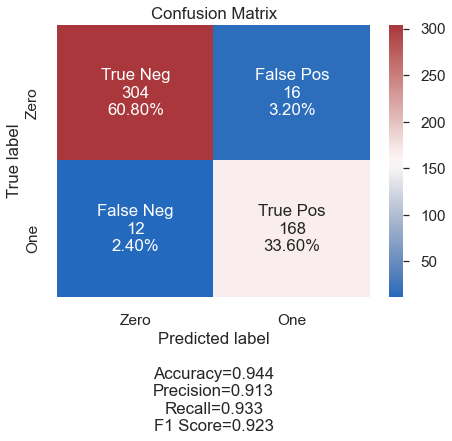

In [33]:
predict(DT, algo='Decision Trees',sampling='actual', random_state=42)

### Model-3: Random forest


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Number of trees in random forest
n_estimators=[50, 100,200,400,800,1000]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [50, 100, 200, 400, 800, 1000], 'max_features': ['auto', 'None'], 'max_depth': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'min_samples_split': [2, 5, 10, 15, 20, 50, 75, 100], 'min_samples_leaf': [1, 2, 4, 5], 'criterion': ['entropy', 'gini']}


In [36]:
rf=RandomForestClassifier(random_state=42)

rf_randomcv_0=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=25,cv=cv,verbose=2,
                               random_state=42,n_jobs=-1,scoring='accuracy')
### fit the randomized model
rf_randomcv_0.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19, 21, 23, 25, 27, 29,
                                                      31, 33, 35, 37, 39, 41,
                                                      43, 45, 47, 49],
                                        'max_features': ['auto', 'None'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 75, 100],
                                        'n_estimators': [50, 100, 200, 400, 800,
                                          

In [37]:
RF = rf_randomcv_0.best_estimator_
RF

RandomForestClassifier(max_depth=41, min_samples_leaf=2, n_estimators=400,
                       random_state=42)

Training score : 99.73333333333333
Testing_score is :96.6
Accuracy Score (y_test vs y_pred):96.6
Cross validation Score is 93.2
Confusion Matrix
[[315   5]
 [ 12 168]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       320
           1       0.97      0.93      0.95       180

    accuracy                           0.97       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.97      0.97      0.97       500
 



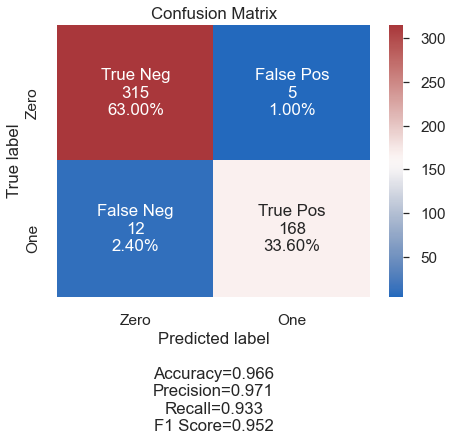

In [38]:
predict(RF,algo='Random Forest',sampling= 'actual',random_state=42)

# Model comaparison

In [39]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                           'Accuracy':Accuracy})

clf_eval_df

,model,resample,precision,recall,f1-score,Accuracy
0,Logistic Regression,actual,0.781022,0.594444,0.675079,0.794
1,Decision Trees,actual,0.913043,0.933333,0.923077,0.944
2,Random Forest,actual,0.971098,0.933333,0.951841,0.966


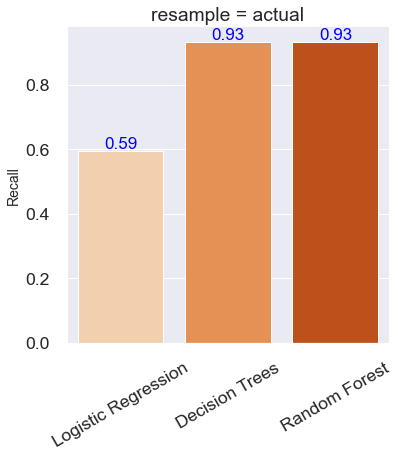

In [61]:
sns.set(font_scale=1.6)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="resample", height=6,col_wrap=1)
g.map(sns.barplot, "model", "recall", palette='Oranges', order=["Logistic Regression","Decision Trees","Random Forest"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)

for ax in g.axes:
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=17, color='blue', xytext=(0, 7),
                 textcoords='offset points')

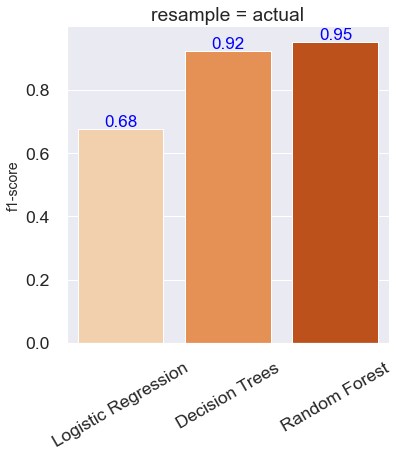

In [62]:
sns.set(font_scale=1.6)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="resample", height=6,col_wrap=1)
g.map(sns.barplot, "model", "f1-score", palette='Oranges', order=["Logistic Regression","Decision Trees","Random Forest"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('f1-score', fontsize=14)



for ax in g.axes:
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=17, color='blue', xytext=(0, 7),
                 textcoords='offset points')

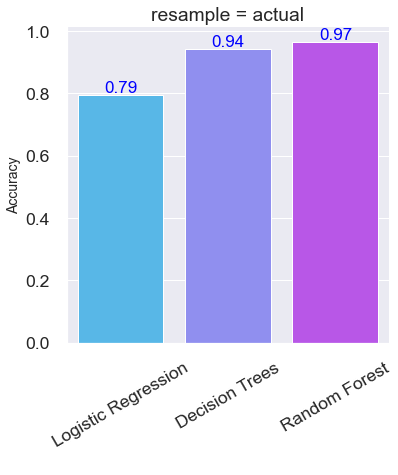

In [63]:
sns.set(font_scale=1.6)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="resample", height=6,col_wrap=1)
g.map(sns.barplot, "model", "Accuracy", palette='cool', order=["Logistic Regression","Decision Trees","Random Forest"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Accuracy', fontsize=14)



for ax in g.axes:
    for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=17, color='blue', xytext=(0, 7),
                 textcoords='offset points')

### Predictions using Random Forest classifier

In [72]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = Scaler_X.transform(x)

    return RF.predict(x)

In [73]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [70]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.
